In [1]:
## Import packages used in analysis script:
import numpy as np
from matplotlib.pyplot import *
import glob
import os
import datetime
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from scipy.optimize import least_squares
from random import sample
from astropy.time import Time
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
import pytz
import bisect
import pygeodesy
from mpl_toolkits import mplot3d
import pandas
%matplotlib inline

In [76]:
drone_directory="/Users/wct9/Desktop/LFOP/LFOP_Drone_Data/"
os.chdir(drone_directory)
query=np.sort(glob.glob("*.csv"))
os.chdir('/Users/wct9/python')
print(query)

['FLY457.csv' 'FLY457_processed.csv' 'FLY458.csv' 'FLY458_processed.csv'
 'FLY460.csv' 'FLY460_processed.csv']


In [80]:
drone_data=pandas.read_csv(drone_directory+"FLY460.csv")

/Users/wct9/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (107,142,143,144,145,146,147,148,149,150,151,364,366,368,369,1298,1389) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
for i,col in enumerate(drone_data.columns):
    print(i,col)

0 Tick#
1 offsetTime
2 IMU_ATTI(0):Longitude
3 IMU_ATTI(0):Latitude
4 IMU_ATTI(0):numSats
5 IMU_ATTI(0):barometer:Raw
6 IMU_ATTI(0):barometer:Smooth
7 IMU_ATTI(0):accel:X
8 IMU_ATTI(0):accel:Y
9 IMU_ATTI(0):accel:Z
10 IMU_ATTI(0):accel:Composite
11 IMU_ATTI(0):gyro:X
12 IMU_ATTI(0):gyro:Y
13 IMU_ATTI(0):gyro:Z
14 IMU_ATTI(0):gyro:Composite
15 IMU_ATTI(0):mag:X
16 IMU_ATTI(0):mag:Y
17 IMU_ATTI(0):mag:Z
18 IMU_ATTI(0):mag:Mod
19 IMU_ATTI(0):velN
20 IMU_ATTI(0):velE
21 IMU_ATTI(0):velD
22 IMU_ATTI(0):velComposite
23 IMU_ATTI(0):velH
24 IMU_ATTI(0):GPS-H
25 IMU_ATTI(0):quatW
26 IMU_ATTI(0):quatX
27 IMU_ATTI(0):quatY
28 IMU_ATTI(0):quatZ
29 IMU_ATTI(0):roll
30 IMU_ATTI(0):pitch
31 IMU_ATTI(0):yaw
32 IMU_ATTI(0):yaw360
33 IMU_ATTI(0):totalGyro:Z
34 IMU_ATTI(0):totalGyro:X
35 IMU_ATTI(0):totalGyro:Y
36 IMU_ATTI(0):magYaw
37 IMU_ATTI(0):Yaw-magYaw
38 IMU_ATTI(0):distanceHP
39 IMU_ATTI(0):distanceTravelled
40 IMU_ATTI(0):directionOfTravel[mag]
41 IMU_ATTI(0):directionOfTravel[true]
42 IMU_ATTI(

664 link_ofdm:link_ofdm_rx_packets
665 link_ofdm:link_ofdm_tx_errors
666 link_ofdm:link_ofdm_rx_erros
667 link_ofdm:link_ofdm_recv_route
668 link_ofdm:link_ofdm_send_route
669 link_imu1_ctrl:link_imu1_ctrl_tx_bytes
670 link_imu1_ctrl:link_imu1_ctrl_rx_bytes
671 link_imu1_ctrl:link_imu1_ctrl_tx_packets
672 link_imu1_ctrl:link_imu1_ctrl_rx_packets
673 link_imu1_ctrl:link_imu1_ctrl_tx_errors
674 link_imu1_ctrl:link_imu1_ctrl_rx_erros
675 link_imu1_ctrl:link_imu1_ctrl_recv_route
676 link_imu1_ctrl:link_imu1_ctrl_send_route
677 link_imu2_ctrl:link_imu2_ctrl_tx_bytes
678 link_imu2_ctrl:link_imu2_ctrl_rx_bytes
679 link_imu2_ctrl:link_imu2_ctrl_tx_packets
680 link_imu2_ctrl:link_imu2_ctrl_rx_packets
681 link_imu2_ctrl:link_imu2_ctrl_tx_errors
682 link_imu2_ctrl:link_imu2_ctrl_rx_erros
683 link_imu2_ctrl:link_imu2_ctrl_recv_route
684 link_imu2_ctrl:link_imu2_ctrl_send_route
685 link_imu1_cmd:link_imu1_cmd_tx_bytes
686 link_imu1_cmd:link_imu1_cmd_rx_bytes
687 link_imu1_cmd:link_imu1_cmd_tx_packe

913 rc_gps_data:month
914 rc_gps_data:day
915 rc_gps_data:longtitude
916 rc_gps_data:latitude
917 rc_gps_data:xv
918 rc_gps_data:yv
919 rc_gps_data:gps_num
920 rc_gps_data:f_scale
921 rc_gps_data:gps_state
922 err_code:imu1_break
923 err_code:imu2_break
924 err_code:gcm0_break
925 err_code:gcm1_break
926 err_code:gcm2_break
927 err_code:imu0_fault
928 err_code:imu1_fault
929 err_code:imu2_fault
930 err_code:gcm0_fault
931 err_code:gcm1_fault
932 err_code:gcm2_fault
933 err_code:mc_fault
934 err_code:mc_dev
935 err_code:mc_err
936 err_code:mc_act
937 err_code:imu_stat
938 err_code:mag_stat
939 err_code:imu0_dev
940 err_code:imu0_err
941 err_code:imu0_act
942 err_code:imu1_dev
943 err_code:imu1_err
944 err_code:imu1_act
945 err_code:imu2_dev
946 err_code:imu2_err
947 err_code:imu2_act
948 err_code:gcm0_dev
949 err_code:gcm0_err
950 err_code:gcm0_act
951 err_code:gcm1_dev
952 err_code:gcm1_err
953 err_code:gcm1_act
954 err_code:gcm2_dev
955 err_code:gcm2_err
956 err_code:gcm2_act
957 gs_r

In [35]:
drone_data['RTKdata:Date']
#plot(drone_data['offsetTime'])
#plot(drone_data['GPS:dateTimeStamp'])
for i,ts in enumerate(drone_data['GPS:dateTimeStamp']):
    print(i,ts,drone_data['GPS(0):Time'][i],drone_data['GPS(1):Time'][i],drone_data['GPS(2):Time'][i])

0 nan nan nan nan
1 nan nan nan nan
2 nan nan nan nan
3 nan nan nan nan
4 nan nan nan nan
5 nan nan nan nan
6 nan nan nan nan
7 0001-11-30T00:00:00Z 0.0 0.0 0.0
8 0001-11-30T00:00:00Z 0.0 0.0 0.0
9 0001-11-30T00:00:00Z 0.0 0.0 0.0
10 2015-10-18T00:00:00Z 0.0 0.0 0.0
11 2015-10-18T00:00:00Z 0.0 0.0 0.0
12 2015-10-18T00:00:00Z 0.0 0.0 0.0
13 2015-10-18T00:00:00Z 0.0 0.0 0.0
14 2015-10-18T00:00:00Z 0.0 0.0 0.0
15 2015-10-18T00:00:00Z 0.0 0.0 0.0
16 2015-10-18T00:00:00Z 0.0 0.0 0.0
17 2015-10-18T00:00:00Z 0.0 0.0 0.0
18 2015-10-18T00:00:00Z 0.0 1.0 1.0
19 2015-10-18T00:00:00Z 0.0 1.0 1.0
20 2015-10-18T00:00:00Z 0.0 1.0 1.0
21 2015-10-18T00:00:01Z 1.0 1.0 1.0
22 2015-10-18T00:00:01Z 1.0 1.0 1.0
23 2015-10-18T00:00:01Z 1.0 1.0 1.0
24 2015-10-18T00:00:01Z 1.0 1.0 1.0
25 2015-10-18T00:00:01Z 1.0 1.0 1.0
26 2015-10-18T00:00:01Z 1.0 1.0 1.0
27 2015-10-18T00:00:01Z 1.0 1.0 1.0
28 2015-10-18T00:00:01Z 1.0 2.0 1.0
29 2015-10-18T00:00:01Z 1.0 2.0 1.0
30 2015-10-18T00:00:02Z 2.0 2.0 2.0
31 2015-10-18

238 2021-07-30T18:55:36Z 185536.0 185536.0 185536.0
239 2021-07-30T18:55:37Z 185537.0 185536.0 185537.0
240 2021-07-30T18:55:37Z 185537.0 185536.0 185537.0
241 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
242 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
243 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
244 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
245 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
246 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
247 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
248 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
249 2021-07-30T18:55:37Z 185537.0 185537.0 185538.0
250 2021-07-30T18:55:37Z 185537.0 185537.0 185538.0
251 2021-07-30T18:55:38Z 185538.0 185538.0 185538.0
252 2021-07-30T18:55:38Z 185538.0 185538.0 185538.0
253 2021-07-30T18:55:38Z 185538.0 185538.0 185538.0
254 2021-07-30T18:55:38Z 185538.0 185538.0 185538.0
255 2021-07-30T18:55:38Z 185538.0 185538.0 185538.0
256 2021-07-30T18:55:38Z 185538.0 185538.0 185538.0
257 2021-07-

438 2021-07-30T18:55:55Z 185555.0 185555.0 185555.0
439 2021-07-30T18:55:56Z 185556.0 185556.0 185555.0
440 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
441 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
442 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
443 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
444 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
445 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
446 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
447 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
448 2021-07-30T18:55:57Z 185557.0 185556.0 185557.0
449 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
450 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
451 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
452 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
453 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
454 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
455 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
456 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
457 2021-07-

738 2021-07-30T18:56:25Z 185625.0 185625.0 185626.0
739 2021-07-30T18:56:25Z 185625.0 185625.0 185626.0
740 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
741 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
742 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
743 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
744 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
745 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
746 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
747 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
748 2021-07-30T18:56:27Z 185627.0 185627.0 185626.0
749 2021-07-30T18:56:27Z 185627.0 185627.0 185626.0
750 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
751 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
752 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
753 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
754 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
755 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
756 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
757 2021-07-

983 2021-07-30T18:56:50Z 185650.0 185650.0 185650.0
984 2021-07-30T18:56:51Z 185651.0 185650.0 185650.0
985 2021-07-30T18:56:51Z 185651.0 185650.0 185650.0
986 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
987 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
988 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
989 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
990 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
991 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
992 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
993 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
994 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
995 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
996 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
997 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
998 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
999 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
1000 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
1001 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
1002 2021-

1238 2021-07-30T18:57:16Z 185716.0 185716.0 185716.0
1239 2021-07-30T18:57:16Z 185716.0 185716.0 185716.0
1240 2021-07-30T18:57:16Z 185716.0 185716.0 185716.0
1241 2021-07-30T18:57:16Z 185716.0 185716.0 185716.0
1242 2021-07-30T18:57:16Z 185716.0 185716.0 185716.0
1243 2021-07-30T18:57:16Z 185716.0 185716.0 185716.0
1244 2021-07-30T18:57:16Z 185716.0 185716.0 185717.0
1245 2021-07-30T18:57:16Z 185716.0 185716.0 185717.0
1246 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1247 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1248 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1249 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1250 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1251 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1252 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1253 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1254 2021-07-30T18:57:18Z 185718.0 185717.0 185717.0
1255 2021-07-30T18:57:18Z 185718.0 185717.0 185717.0
1256 2021-07-30T18:57:18Z 185718.0 185718.0 18

1537 2021-07-30T18:57:46Z 185746.0 185746.0 185746.0
1538 2021-07-30T18:57:46Z 185746.0 185746.0 185746.0
1539 2021-07-30T18:57:46Z 185746.0 185746.0 185746.0
1540 2021-07-30T18:57:46Z 185746.0 185746.0 185746.0
1541 2021-07-30T18:57:46Z 185746.0 185746.0 185746.0
1542 2021-07-30T18:57:46Z 185746.0 185746.0 185746.0
1543 2021-07-30T18:57:47Z 185747.0 185746.0 185746.0
1544 2021-07-30T18:57:47Z 185747.0 185746.0 185746.0
1545 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1546 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1547 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1548 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1549 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1550 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1551 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1552 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1553 2021-07-30T18:57:47Z 185747.0 185747.0 185748.0
1554 2021-07-30T18:57:47Z 185747.0 185747.0 185748.0
1555 2021-07-30T18:57:48Z 185748.0 185748.0 18

1837 2021-07-30T18:58:16Z 185816.0 185816.0 185816.0
1838 2021-07-30T18:58:16Z 185816.0 185816.0 185816.0
1839 2021-07-30T18:58:16Z 185816.0 185816.0 185816.0
1840 2021-07-30T18:58:16Z 185816.0 185816.0 185816.0
1841 2021-07-30T18:58:16Z 185816.0 185816.0 185816.0
1842 2021-07-30T18:58:17Z 185817.0 185816.0 185817.0
1843 2021-07-30T18:58:17Z 185817.0 185816.0 185817.0
1844 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1845 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1846 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1847 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1848 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1849 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1850 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1851 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1852 2021-07-30T18:58:18Z 185818.0 185817.0 185818.0
1853 2021-07-30T18:58:18Z 185818.0 185817.0 185818.0
1854 2021-07-30T18:58:18Z 185818.0 185818.0 185818.0
1855 2021-07-30T18:58:18Z 185818.0 185818.0 18

2137 2021-07-30T18:58:46Z 185846.0 185846.0 185846.0
2138 2021-07-30T18:58:46Z 185846.0 185846.0 185846.0
2139 2021-07-30T18:58:46Z 185846.0 185846.0 185846.0
2140 2021-07-30T18:58:46Z 185846.0 185846.0 185846.0
2141 2021-07-30T18:58:46Z 185846.0 185846.0 185846.0
2142 2021-07-30T18:58:46Z 185846.0 185847.0 185847.0
2143 2021-07-30T18:58:46Z 185846.0 185847.0 185847.0
2144 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2145 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2146 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2147 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2148 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2149 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2150 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2151 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2152 2021-07-30T18:58:47Z 185847.0 185847.0 185848.0
2153 2021-07-30T18:58:47Z 185847.0 185847.0 185848.0
2154 2021-07-30T18:58:48Z 185848.0 185848.0 185848.0
2155 2021-07-30T18:58:48Z 185848.0 185848.0 18

2437 2021-07-30T18:59:16Z 185916.0 185916.0 185916.0
2438 2021-07-30T18:59:16Z 185916.0 185916.0 185916.0
2439 2021-07-30T18:59:16Z 185916.0 185916.0 185916.0
2440 2021-07-30T18:59:16Z 185916.0 185916.0 185916.0
2441 2021-07-30T18:59:17Z 185917.0 185916.0 185916.0
2442 2021-07-30T18:59:17Z 185917.0 185916.0 185916.0
2443 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2444 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2445 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2446 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2447 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2448 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2449 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2450 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2451 2021-07-30T18:59:17Z 185917.0 185917.0 185918.0
2452 2021-07-30T18:59:17Z 185917.0 185917.0 185918.0
2453 2021-07-30T18:59:18Z 185918.0 185918.0 185918.0
2454 2021-07-30T18:59:18Z 185918.0 185918.0 185918.0
2455 2021-07-30T18:59:18Z 185918.0 185918.0 18

2737 2021-07-30T18:59:46Z 185946.0 185946.0 185946.0
2738 2021-07-30T18:59:46Z 185946.0 185946.0 185946.0
2739 2021-07-30T18:59:46Z 185946.0 185946.0 185946.0
2740 2021-07-30T18:59:46Z 185946.0 185946.0 185946.0
2741 2021-07-30T18:59:47Z 185947.0 185946.0 185947.0
2742 2021-07-30T18:59:47Z 185947.0 185946.0 185947.0
2743 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2744 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2745 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2746 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2747 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2748 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2749 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2750 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2751 2021-07-30T18:59:47Z 185947.0 185948.0 185948.0
2752 2021-07-30T18:59:47Z 185947.0 185948.0 185948.0
2753 2021-07-30T18:59:48Z 185948.0 185948.0 185948.0
2754 2021-07-30T18:59:48Z 185948.0 185948.0 185948.0
2755 2021-07-30T18:59:48Z 185948.0 185948.0 18

2980 2021-07-30T19:00:10Z 190010.0 190010.0 190011.0
2981 2021-07-30T19:00:10Z 190010.0 190010.0 190011.0
2982 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2983 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2984 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2985 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2986 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2987 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2988 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2989 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2990 2021-07-30T19:00:12Z 190012.0 190011.0 190012.0
2991 2021-07-30T19:00:12Z 190012.0 190011.0 190012.0
2992 2021-07-30T19:00:12Z 190012.0 190012.0 190012.0
2993 2021-07-30T19:00:12Z 190012.0 190012.0 190012.0
2994 2021-07-30T19:00:12Z 190012.0 190012.0 190012.0
2995 2021-07-30T19:00:12Z 190012.0 190012.0 190012.0
2996 2021-07-30T19:00:12Z 190012.0 190012.0 190012.0
2997 2021-07-30T19:00:12Z 190012.0 190012.0 190012.0
2998 2021-07-30T19:00:12Z 190012.0 190012.0 19

3209 2021-07-30T19:00:33Z 190033.0 190033.0 190033.0
3210 2021-07-30T19:00:33Z 190033.0 190034.0 190034.0
3211 2021-07-30T19:00:33Z 190033.0 190034.0 190034.0
3212 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3213 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3214 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3215 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3216 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3217 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3218 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3219 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3220 2021-07-30T19:00:34Z 190034.0 190034.0 190035.0
3221 2021-07-30T19:00:34Z 190034.0 190034.0 190035.0
3222 2021-07-30T19:00:35Z 190035.0 190035.0 190035.0
3223 2021-07-30T19:00:35Z 190035.0 190035.0 190035.0
3224 2021-07-30T19:00:35Z 190035.0 190035.0 190035.0
3225 2021-07-30T19:00:35Z 190035.0 190035.0 190035.0
3226 2021-07-30T19:00:35Z 190035.0 190035.0 190035.0
3227 2021-07-30T19:00:35Z 190035.0 190035.0 19

3386 2021-07-30T19:00:51Z 190051.0 190051.0 190051.0
3387 2021-07-30T19:00:51Z 190051.0 190051.0 190051.0
3388 2021-07-30T19:00:51Z 190051.0 190051.0 190051.0
3389 2021-07-30T19:00:52Z 190052.0 190051.0 190051.0
3390 2021-07-30T19:00:52Z 190052.0 190051.0 190051.0
3391 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3392 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3393 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3394 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3395 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3396 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3397 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3398 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3399 2021-07-30T19:00:53Z 190053.0 190053.0 190053.0
3400 2021-07-30T19:00:53Z 190053.0 190053.0 190053.0
3401 2021-07-30T19:00:53Z 190053.0 190053.0 190053.0
3402 2021-07-30T19:00:53Z 190053.0 190053.0 190053.0
3403 2021-07-30T19:00:53Z 190053.0 190053.0 190053.0
3404 2021-07-30T19:00:53Z 190053.0 190053.0 19

3544 2021-07-30T19:01:07Z 190107.0 190107.0 190107.0
3545 2021-07-30T19:01:07Z 190107.0 190107.0 190107.0
3546 2021-07-30T19:01:07Z 190107.0 190107.0 190107.0
3547 2021-07-30T19:01:07Z 190107.0 190107.0 190107.0
3548 2021-07-30T19:01:07Z 190107.0 190107.0 190107.0
3549 2021-07-30T19:01:07Z 190107.0 190107.0 190108.0
3550 2021-07-30T19:01:07Z 190107.0 190107.0 190108.0
3551 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3552 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3553 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3554 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3555 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3556 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3557 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3558 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3559 2021-07-30T19:01:08Z 190108.0 190108.0 190109.0
3560 2021-07-30T19:01:08Z 190108.0 190108.0 190109.0
3561 2021-07-30T19:01:09Z 190109.0 190109.0 190109.0
3562 2021-07-30T19:01:09Z 190109.0 190109.0 19

3737 2021-07-30T19:01:26Z 190126.0 190126.0 190126.0
3738 2021-07-30T19:01:26Z 190126.0 190126.0 190126.0
3739 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3740 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3741 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3742 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3743 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3744 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3745 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3746 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3747 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3748 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3749 2021-07-30T19:01:27Z 190127.0 190127.0 190128.0
3750 2021-07-30T19:01:27Z 190127.0 190127.0 190128.0
3751 2021-07-30T19:01:28Z 190128.0 190128.0 190128.0
3752 2021-07-30T19:01:28Z 190128.0 190128.0 190128.0
3753 2021-07-30T19:01:28Z 190128.0 190128.0 190128.0
3754 2021-07-30T19:01:28Z 190128.0 190128.0 190128.0
3755 2021-07-30T19:01:28Z 190128.0 190128.0 19

4036 2021-07-30T19:01:56Z 190156.0 190156.0 190156.0
4037 2021-07-30T19:01:56Z 190156.0 190156.0 190156.0
4038 2021-07-30T19:01:57Z 190157.0 190156.0 190157.0
4039 2021-07-30T19:01:57Z 190157.0 190156.0 190157.0
4040 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4041 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4042 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4043 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4044 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4045 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4046 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4047 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4048 2021-07-30T19:01:58Z 190158.0 190157.0 190158.0
4049 2021-07-30T19:01:58Z 190158.0 190157.0 190158.0
4050 2021-07-30T19:01:58Z 190158.0 190158.0 190158.0
4051 2021-07-30T19:01:58Z 190158.0 190158.0 190158.0
4052 2021-07-30T19:01:58Z 190158.0 190158.0 190158.0
4053 2021-07-30T19:01:58Z 190158.0 190158.0 190158.0
4054 2021-07-30T19:01:58Z 190158.0 190158.0 19

4336 2021-07-30T19:02:26Z 190226.0 190226.0 190226.0
4337 2021-07-30T19:02:26Z 190226.0 190226.0 190226.0
4338 2021-07-30T19:02:26Z 190226.0 190227.0 190226.0
4339 2021-07-30T19:02:26Z 190226.0 190227.0 190226.0
4340 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4341 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4342 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4343 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4344 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4345 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4346 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4347 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4348 2021-07-30T19:02:28Z 190228.0 190227.0 190228.0
4349 2021-07-30T19:02:28Z 190228.0 190227.0 190228.0
4350 2021-07-30T19:02:28Z 190228.0 190228.0 190228.0
4351 2021-07-30T19:02:28Z 190228.0 190228.0 190228.0
4352 2021-07-30T19:02:28Z 190228.0 190228.0 190228.0
4353 2021-07-30T19:02:28Z 190228.0 190228.0 190228.0
4354 2021-07-30T19:02:28Z 190228.0 190228.0 19

4636 2021-07-30T19:02:56Z 190256.0 190256.0 190256.0
4637 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4638 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4639 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4640 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4641 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4642 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4643 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4644 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4645 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4646 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4647 2021-07-30T19:02:58Z 190258.0 190257.0 190258.0
4648 2021-07-30T19:02:58Z 190258.0 190257.0 190258.0
4649 2021-07-30T19:02:58Z 190258.0 190258.0 190258.0
4650 2021-07-30T19:02:58Z 190258.0 190258.0 190258.0
4651 2021-07-30T19:02:58Z 190258.0 190258.0 190258.0
4652 2021-07-30T19:02:58Z 190258.0 190258.0 190258.0
4653 2021-07-30T19:02:58Z 190258.0 190258.0 190258.0
4654 2021-07-30T19:02:58Z 190258.0 190258.0 19

4936 2021-07-30T19:03:27Z 190327.0 190326.0 190327.0
4937 2021-07-30T19:03:27Z 190327.0 190326.0 190327.0
4938 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4939 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4940 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4941 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4942 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4943 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4944 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4945 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4946 2021-07-30T19:03:28Z 190328.0 190327.0 190328.0
4947 2021-07-30T19:03:28Z 190328.0 190327.0 190328.0
4948 2021-07-30T19:03:28Z 190328.0 190328.0 190328.0
4949 2021-07-30T19:03:28Z 190328.0 190328.0 190328.0
4950 2021-07-30T19:03:28Z 190328.0 190328.0 190328.0
4951 2021-07-30T19:03:28Z 190328.0 190328.0 190328.0
4952 2021-07-30T19:03:28Z 190328.0 190328.0 190328.0
4953 2021-07-30T19:03:28Z 190328.0 190328.0 190328.0
4954 2021-07-30T19:03:28Z 190328.0 190328.0 19

5236 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5237 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5238 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5239 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5240 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5241 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5242 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5243 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5244 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5245 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5246 2021-07-30T19:03:57Z 190357.0 190358.0 190358.0
5247 2021-07-30T19:03:57Z 190357.0 190358.0 190358.0
5248 2021-07-30T19:03:58Z 190358.0 190358.0 190358.0
5249 2021-07-30T19:03:58Z 190358.0 190358.0 190358.0
5250 2021-07-30T19:03:58Z 190358.0 190358.0 190358.0
5251 2021-07-30T19:03:58Z 190358.0 190358.0 190358.0
5252 2021-07-30T19:03:58Z 190358.0 190358.0 190358.0
5253 2021-07-30T19:03:58Z 190358.0 190358.0 190358.0
5254 2021-07-30T19:03:58Z 190358.0 190358.0 19

5500 2021-07-30T19:04:23Z 190423.0 190423.0 190423.0
5501 2021-07-30T19:04:23Z 190423.0 190423.0 190423.0
5502 2021-07-30T19:04:23Z 190423.0 190423.0 190423.0
5503 2021-07-30T19:04:23Z 190423.0 190423.0 190423.0
5504 2021-07-30T19:04:23Z 190423.0 190423.0 190423.0
5505 2021-07-30T19:04:23Z 190423.0 190423.0 190424.0
5506 2021-07-30T19:04:23Z 190423.0 190423.0 190424.0
5507 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5508 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5509 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5510 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5511 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5512 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5513 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5514 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5515 2021-07-30T19:04:24Z 190424.0 190425.0 190425.0
5516 2021-07-30T19:04:24Z 190424.0 190425.0 190425.0
5517 2021-07-30T19:04:25Z 190425.0 190425.0 190425.0
5518 2021-07-30T19:04:25Z 190425.0 190425.0 19

5675 2021-07-30T19:04:40Z 190440.0 190441.0 190441.0
5676 2021-07-30T19:04:40Z 190440.0 190441.0 190441.0
5677 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5678 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5679 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5680 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5681 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5682 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5683 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5684 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5685 2021-07-30T19:04:41Z 190441.0 190442.0 190442.0
5686 2021-07-30T19:04:41Z 190441.0 190442.0 190442.0
5687 2021-07-30T19:04:42Z 190442.0 190442.0 190442.0
5688 2021-07-30T19:04:42Z 190442.0 190442.0 190442.0
5689 2021-07-30T19:04:42Z 190442.0 190442.0 190442.0
5690 2021-07-30T19:04:42Z 190442.0 190442.0 190442.0
5691 2021-07-30T19:04:42Z 190442.0 190442.0 190442.0
5692 2021-07-30T19:04:42Z 190442.0 190442.0 190442.0
5693 2021-07-30T19:04:42Z 190442.0 190442.0 19

5924 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5925 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5926 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5927 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5928 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5929 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5930 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5931 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5932 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5933 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5934 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5935 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5936 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5937 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5938 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5939 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5940 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5941 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5942 2021-07-30T19:05:08Z 190508.0 190507.0 19

6136 2021-07-30T19:05:27Z 190527.0 190527.0 190527.0
6137 2021-07-30T19:05:27Z 190527.0 190527.0 190527.0
6138 2021-07-30T19:05:27Z 190527.0 190527.0 190527.0
6139 2021-07-30T19:05:27Z 190527.0 190527.0 190527.0
6140 2021-07-30T19:05:27Z 190527.0 190527.0 190527.0
6141 2021-07-30T19:05:27Z 190527.0 190527.0 190528.0
6142 2021-07-30T19:05:27Z 190527.0 190527.0 190528.0
6143 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6144 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6145 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6146 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6147 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6148 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6149 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6150 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6151 2021-07-30T19:05:28Z 190528.0 190528.0 190529.0
6152 2021-07-30T19:05:28Z 190528.0 190528.0 190529.0
6153 2021-07-30T19:05:29Z 190529.0 190529.0 190529.0
6154 2021-07-30T19:05:29Z 190529.0 190529.0 19

6436 2021-07-30T19:05:57Z 190557.0 190557.0 190557.0
6437 2021-07-30T19:05:57Z 190557.0 190557.0 190557.0
6438 2021-07-30T19:05:57Z 190557.0 190557.0 190557.0
6439 2021-07-30T19:05:57Z 190557.0 190557.0 190557.0
6440 2021-07-30T19:05:57Z 190557.0 190557.0 190557.0
6441 2021-07-30T19:05:57Z 190557.0 190557.0 190557.0
6442 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6443 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6444 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6445 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6446 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6447 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6448 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6449 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6450 2021-07-30T19:05:58Z 190558.0 190559.0 190558.0
6451 2021-07-30T19:05:58Z 190558.0 190559.0 190558.0
6452 2021-07-30T19:05:59Z 190559.0 190559.0 190559.0
6453 2021-07-30T19:05:59Z 190559.0 190559.0 190559.0
6454 2021-07-30T19:05:59Z 190559.0 190559.0 19

6735 2021-07-30T19:06:27Z 190627.0 190627.0 190627.0
6736 2021-07-30T19:06:27Z 190627.0 190627.0 190627.0
6737 2021-07-30T19:06:27Z 190627.0 190627.0 190627.0
6738 2021-07-30T19:06:27Z 190627.0 190627.0 190627.0
6739 2021-07-30T19:06:27Z 190627.0 190627.0 190627.0
6740 2021-07-30T19:06:27Z 190627.0 190627.0 190628.0
6741 2021-07-30T19:06:27Z 190627.0 190627.0 190628.0
6742 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6743 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6744 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6745 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6746 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6747 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6748 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6749 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6750 2021-07-30T19:06:29Z 190629.0 190629.0 190628.0
6751 2021-07-30T19:06:29Z 190629.0 190629.0 190628.0
6752 2021-07-30T19:06:29Z 190629.0 190629.0 190629.0
6753 2021-07-30T19:06:29Z 190629.0 190629.0 19

7035 2021-07-30T19:06:57Z 190657.0 190657.0 190657.0
7036 2021-07-30T19:06:57Z 190657.0 190657.0 190657.0
7037 2021-07-30T19:06:57Z 190657.0 190657.0 190657.0
7038 2021-07-30T19:06:57Z 190657.0 190657.0 190657.0
7039 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7040 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7041 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7042 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7043 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7044 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7045 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7046 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7047 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7048 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7049 2021-07-30T19:06:59Z 190659.0 190658.0 190659.0
7050 2021-07-30T19:06:59Z 190659.0 190658.0 190659.0
7051 2021-07-30T19:06:59Z 190659.0 190659.0 190659.0
7052 2021-07-30T19:06:59Z 190659.0 190659.0 190659.0
7053 2021-07-30T19:06:59Z 190659.0 190659.0 19

7335 2021-07-30T19:07:27Z 190727.0 190727.0 190727.0
7336 2021-07-30T19:07:27Z 190727.0 190727.0 190727.0
7337 2021-07-30T19:07:27Z 190727.0 190727.0 190727.0
7338 2021-07-30T19:07:28Z 190728.0 190727.0 190728.0
7339 2021-07-30T19:07:28Z 190728.0 190727.0 190728.0
7340 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7341 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7342 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7343 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7344 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7345 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7346 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7347 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7348 2021-07-30T19:07:29Z 190729.0 190729.0 190729.0
7349 2021-07-30T19:07:29Z 190729.0 190729.0 190729.0
7350 2021-07-30T19:07:29Z 190729.0 190729.0 190729.0
7351 2021-07-30T19:07:29Z 190729.0 190729.0 190729.0
7352 2021-07-30T19:07:29Z 190729.0 190729.0 190729.0
7353 2021-07-30T19:07:29Z 190729.0 190729.0 19

7635 2021-07-30T19:07:57Z 190757.0 190757.0 190757.0
7636 2021-07-30T19:07:57Z 190757.0 190757.0 190757.0
7637 2021-07-30T19:07:57Z 190757.0 190757.0 190757.0
7638 2021-07-30T19:07:57Z 190757.0 190757.0 190757.0
7639 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7640 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7641 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7642 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7643 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7644 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7645 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7646 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7647 2021-07-30T19:07:59Z 190759.0 190759.0 190759.0
7648 2021-07-30T19:07:59Z 190759.0 190759.0 190759.0
7649 2021-07-30T19:07:59Z 190759.0 190759.0 190759.0
7650 2021-07-30T19:07:59Z 190759.0 190759.0 190759.0
7651 2021-07-30T19:07:59Z 190759.0 190759.0 190759.0
7652 2021-07-30T19:07:59Z 190759.0 190759.0 190759.0
7653 2021-07-30T19:07:59Z 190759.0 190759.0 19

7935 2021-07-30T19:08:27Z 190827.0 190827.0 190827.0
7936 2021-07-30T19:08:27Z 190827.0 190827.0 190827.0
7937 2021-07-30T19:08:27Z 190827.0 190827.0 190828.0
7938 2021-07-30T19:08:27Z 190827.0 190827.0 190828.0
7939 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7940 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7941 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7942 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7943 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7944 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7945 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7946 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7947 2021-07-30T19:08:29Z 190829.0 190829.0 190829.0
7948 2021-07-30T19:08:29Z 190829.0 190829.0 190829.0
7949 2021-07-30T19:08:29Z 190829.0 190829.0 190829.0
7950 2021-07-30T19:08:29Z 190829.0 190829.0 190829.0
7951 2021-07-30T19:08:29Z 190829.0 190829.0 190829.0
7952 2021-07-30T19:08:29Z 190829.0 190829.0 190829.0
7953 2021-07-30T19:08:29Z 190829.0 190829.0 19

8235 2021-07-30T19:08:57Z 190857.0 190857.0 190857.0
8236 2021-07-30T19:08:57Z 190857.0 190857.0 190857.0
8237 2021-07-30T19:08:57Z 190857.0 190857.0 190857.0
8238 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8239 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8240 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8241 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8242 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8243 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8244 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8245 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8246 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8247 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8248 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8249 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8250 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8251 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8252 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8253 2021-07-30T19:08:59Z 190859.0 190859.0 19

In [12]:
680.342/60

11.339033333333333

In [40]:
def interp_time(df_in):
    # find where the GPS turns on
    gps_idx = df_in[df_in.gpsUsed == True].index[0]
    # find the first datetimestamp after that
    first_dts = df_in["GPS:dateTimeStamp"][gps_idx]
    # oops, maybe the GPS needs a minute to warm up
    while(type(first_dts) == type(1.0) and gps_idx < len(df_in)-10):
        print("inc")
        gps_idx = gps_idx+1
        first_dts = df_in["GPS:dateTimeStamp"][gps_idx]
    print("Interpolating time starting at "+str(first_dts))
    # look for where the datetimestamp ticks
    start_sec = int(first_dts[-3:-1])
    while(int(df_in["GPS:dateTimeStamp"][gps_idx][-3:-1]) == start_sec):
        gps_idx = gps_idx + 1
    # use this reference timestamp to convert the offsetTime column into proper datetimes
    start_dt = pandas.to_datetime(df_in["GPS:dateTimeStamp"][gps_idx])
    offsets = np.array(df_in["offsetTime"]-df_in["offsetTime"][gps_idx])
    offsets = pandas.to_timedelta(offsets, unit='s')
    timestamps = start_dt + offsets
    # put them in the dataframe
    df_in = df_in.assign(timestamp = timestamps)
    df_in = df_in.assign(UTC = timestamps)
    return df_in

In [93]:
interp_time(drone_data)["UTC"]

Interpolating time starting at 2021-07-30T19:20:12Z


0      2021-07-30 19:19:55.215000+00:00
1      2021-07-30 19:19:56.736000+00:00
2      2021-07-30 19:19:57.690000+00:00
3      2021-07-30 19:19:57.853000+00:00
4      2021-07-30 19:19:57.954000+00:00
                     ...               
9702   2021-07-30 19:36:11.880000+00:00
9703   2021-07-30 19:36:11.980000+00:00
9704   2021-07-30 19:36:12.080000+00:00
9705   2021-07-30 19:36:18.407000+00:00
9706   2021-07-30 19:36:18.507000+00:00
Name: UTC, Length: 9707, dtype: datetime64[ns, UTC]

In [97]:
test=pandas.read_csv(drone_directory+"FLY460_processed.csv")
test.columns

Index(['Unnamed: 0', 'Lat', 'Lon', 'hmsl', 'sec_elapsed', 'datetimestamp',
       'tick', 'vel', 'yaw_rtk', 'pitch_rtk', 'pitch', 'roll', 'yaw',
       'yaw_360', 'IMU_lat', 'IMU_lon', 'IMU_hmsl', 'UTC'],
      dtype='object')

/Users/wct9/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  """Entry point for launching an IPython kernel.
/Users/wct9/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  


Text(0.5, 0, 'index')

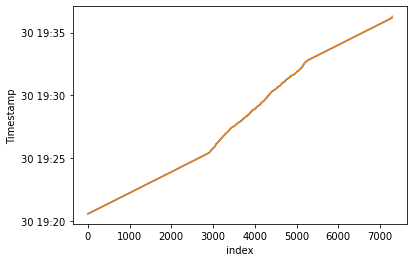

In [98]:
plot(np.array([np.datetime64(test['datetimestamp'][m]) for m in range(len(test['datetimestamp']))]))
plot(np.array([np.datetime64(test['UTC'][m]) for m in range(len(test['UTC']))]))
ylabel('Timestamp')
xlabel('index')

In [61]:
test['datetimestamp'][0],test['UTC'][0]

('2021-07-30T18:55:41Z', '2021-07-30 18:55:40.978000+00:00')

In [63]:
test.UTC

0       2021-07-30 18:55:40.978000+00:00
1       2021-07-30 18:55:41.078000+00:00
2       2021-07-30 18:55:41.178000+00:00
3       2021-07-30 18:55:41.278000+00:00
4       2021-07-30 18:55:41.379000+00:00
                      ...               
8067    2021-07-30 19:09:10.636000+00:00
8068    2021-07-30 19:09:10.736000+00:00
8069    2021-07-30 19:09:10.837000+00:00
8070    2021-07-30 19:09:10.937000+00:00
8071    2021-07-30 19:09:11.037000+00:00
Name: UTC, Length: 8072, dtype: object

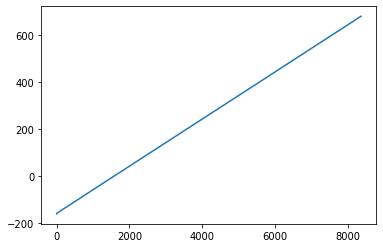

In [74]:
plot(drone_data['offsetTime'])

In [88]:
for i,key in enumerate(drone_data.keys()):
    print(i,key)

0 Tick#
1 offsetTime
2 IMU_ATTI(0):Longitude
3 IMU_ATTI(0):Latitude
4 IMU_ATTI(0):numSats
5 IMU_ATTI(0):barometer:Raw
6 IMU_ATTI(0):barometer:Smooth
7 IMU_ATTI(0):accel:X
8 IMU_ATTI(0):accel:Y
9 IMU_ATTI(0):accel:Z
10 IMU_ATTI(0):accel:Composite
11 IMU_ATTI(0):gyro:X
12 IMU_ATTI(0):gyro:Y
13 IMU_ATTI(0):gyro:Z
14 IMU_ATTI(0):gyro:Composite
15 IMU_ATTI(0):mag:X
16 IMU_ATTI(0):mag:Y
17 IMU_ATTI(0):mag:Z
18 IMU_ATTI(0):mag:Mod
19 IMU_ATTI(0):velN
20 IMU_ATTI(0):velE
21 IMU_ATTI(0):velD
22 IMU_ATTI(0):velComposite
23 IMU_ATTI(0):velH
24 IMU_ATTI(0):GPS-H
25 IMU_ATTI(0):quatW
26 IMU_ATTI(0):quatX
27 IMU_ATTI(0):quatY
28 IMU_ATTI(0):quatZ
29 IMU_ATTI(0):roll
30 IMU_ATTI(0):pitch
31 IMU_ATTI(0):yaw
32 IMU_ATTI(0):yaw360
33 IMU_ATTI(0):totalGyro:Z
34 IMU_ATTI(0):totalGyro:X
35 IMU_ATTI(0):totalGyro:Y
36 IMU_ATTI(0):magYaw
37 IMU_ATTI(0):Yaw-magYaw
38 IMU_ATTI(0):distanceHP
39 IMU_ATTI(0):distanceTravelled
40 IMU_ATTI(0):directionOfTravel[mag]
41 IMU_ATTI(0):directionOfTravel[true]
42 IMU_ATTI(

720 link_imu_BC:link_imu_BC_rx_packets
721 link_imu_BC:link_imu_BC_tx_errors
722 link_imu_BC:link_imu_BC_rx_erros
723 link_imu_BC:link_imu_BC_recv_route
724 link_imu_BC:link_imu_BC_send_route
725 link_bat:link_bat_tx_bytes
726 link_bat:link_bat_rx_bytes
727 link_bat:link_bat_tx_packets
728 link_bat:link_bat_rx_packets
729 link_bat:link_bat_tx_errors
730 link_bat:link_bat_rx_erros
731 link_bat:link_bat_recv_route
732 link_bat:link_bat_send_route
733 link_zenmuse:link_zenmuse_tx_bytes
734 link_zenmuse:link_zenmuse_rx_bytes
735 link_zenmuse:link_zenmuse_tx_packets
736 link_zenmuse:link_zenmuse_rx_packets
737 link_zenmuse:link_zenmuse_tx_errors
738 link_zenmuse:link_zenmuse_rx_erros
739 link_zenmuse:link_zenmuse_recv_route
740 link_zenmuse:link_zenmuse_send_route
741 link_exgcm_BCS:link_exgcm_BCS_tx_bytes
742 link_exgcm_BCS:link_exgcm_BCS_rx_bytes
743 link_exgcm_BCS:link_exgcm_BCS_tx_packets
744 link_exgcm_BCS:link_exgcm_BCS_rx_packets
745 link_exgcm_BCS:link_exgcm_BCS_tx_errors
746 link_e

1220 uart_monitor:uart100_tx
1221 uart_monitor:uart100_txlost
1222 uart_monitor:uart100_rx
1223 uart_monitor:uart100_rxlost
1224 uart_monitor:uart100_dbg0
1225 uart_monitor:uart100_dbg1
1226 uart_monitor:uart100_dbg2
1227 uart_monitor:uart100_dbg3
1228 uart_monitor:uart100_dbg4
1229 uart_monitor:uart100_dbg5
1230 system_monitor:root_max_time
1231 system_monitor:root_average_time
1232 system_monitor:root_warn
1233 system_monitor:root_pend
1234 system_monitor:root_stack
1235 system_monitor:root_reserv
1236 system_monitor:wq_max_time
1237 system_monitor:wq_average_time
1238 system_monitor:wq_warn
1239 system_monitor:wq_pend
1240 system_monitor:wq_stack
1241 system_monitor:wq_reserv
1242 system_monitor:task_sd_max_time
1243 system_monitor:task_sd_average_time
1244 system_monitor:task_sd_warn
1245 system_monitor:task_sd_pend
1246 system_monitor:task_sd_stack
1247 system_monitor:task_sd_reserv
1248 system_monitor:task_c_average_time
1249 system_monitor:task_c_warn
1250 system_monitor:task_c_

0 nan
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 nan
13 nan
14 nan
15 nan
16 nan
17 nan
18 nan
19 nan
20 nan
21 nan
22 nan
23 nan
24 nan
25 nan
26 nan
27 nan
28 nan
29 nan
30 nan
31 nan
32 nan
33 nan
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan
45 nan
46 nan
47 nan
48 nan
49 nan
50 nan
51 nan
52 nan
53 nan
54 nan
55 nan
56 nan
57 nan
58 nan
59 nan
60 nan
61 nan
62 nan
63 nan
64 nan
65 nan
66 nan
67 nan
68 nan
69 nan
70 nan
71 nan
72 nan
73 nan
74 nan
75 nan
76 nan
77 nan
78 nan
79 nan
80 nan
81 nan
82 nan
83 nan
84 nan
85 nan
86 nan
87 nan
88 nan
89 nan
90 nan
91 nan
92 nan
93 nan
94 nan
95 nan
96 nan
97 nan
98 nan
99 nan
100 nan
101 nan
102 nan
103 nan
104 nan
105 nan
106 nan
107 nan
108 nan
109 nan
110 nan
111 nan
112 nan
113 nan
114 nan
115 nan
116 nan
117 nan
118 nan
119 nan
120 nan
121 nan
122 nan
123 nan
124 nan
125 nan
126 nan
127 nan
128 nan
129 nan
130 nan
131 nan
132 nan
133 nan
134 nan
135 nan
136 nan
137 nan
138 na

769 41.32069557684505
770 41.32069557684505
771 41.32069560469693
772 41.32069560469693
773 41.32069559416309
774 41.32069558967017
775 41.32069558967017
776 41.320695593317325
777 41.320695593317325
778 41.32069559766045
779 41.32069559766045
780 41.32069560461144
781 41.32069560461144
782 41.32069560461144
783 41.32069558758183
784 41.32069558686364
785 41.32069558686364
786 41.32069556183007
787 41.32069556183007
788 41.32069557627477
789 41.32069557627477
790 41.32069557419589
791 41.32069557419589
792 41.3206955860972
793 41.3206955860972
794 41.32069555952141
795 41.32069555952141
796 41.320695565341936
797 41.320695565341936
798 41.320695582036095
799 41.320695582036095
800 41.32069556464968
801 41.32069556464968
802 41.320695558524044
803 41.320695558524044
804 41.32069555993788
805 41.32069555993788
806 41.32069555898638
807 41.32069555898638
808 41.32069550026907
809 41.32069550026907
810 41.320695505116156
811 41.320695505116156
812 41.32069551800491
813 41.32069551800491
81

1269 41.320695495955036
1270 41.320695495955036
1271 41.32069548730684
1272 41.32069548730684
1273 41.32069547068421
1274 41.32069547068421
1275 41.320695498515725
1276 41.320695498515725
1277 41.320695492587845
1278 41.320695492587845
1279 41.32069549691018
1280 41.32069549691018
1281 41.32069549691018
1282 41.32069549691018
1283 41.32069547679329
1284 41.32069547679329
1285 41.32069551326628
1286 41.32069551326628
1287 41.3206954990031
1288 41.3206954990031
1289 41.32069553931317
1290 41.32069553931317
1291 41.320695491157366
1292 41.320695491157366
1293 41.32069549787132
1294 41.32069549787132
1295 41.32069547903267
1296 41.32069547903267
1297 41.320695475839294
1298 41.320695475839294
1299 41.320695464237424
1300 41.320695464237424
1301 41.32069548456544
1302 41.32069548456544
1303 41.32069545258716
1304 41.32069545258716
1305 41.320695468522906
1306 41.320695468522906
1307 41.32069547145658
1308 41.32069547145658
1309 41.32069543428349
1310 41.32069543428349
1311 41.32069547241922

2018 41.320695482925736
2019 41.32069548594762
2020 41.32069548594762
2021 41.32069551216126
2022 41.32069551216126
2023 41.32069555745471
2024 41.32069555745471
2025 41.32069551684593
2026 41.32069551684593
2027 41.32069553826161
2028 41.32069553826161
2029 41.32069556132527
2030 41.32069556132527
2031 41.32069554450339
2032 41.32069554450339
2033 41.320695522254894
2034 41.320695522254894
2035 41.3206955254558
2036 41.3206955254558
2037 41.32069552307245
2038 41.32069552307245
2039 41.32069553642719
2040 41.32069553642719
2041 41.32069555828211
2042 41.32069555828211
2043 41.320695514239695
2044 41.320695514239695
2045 41.320695533701155
2046 41.320695533701155
2047 41.320695544229615
2048 41.320695544229615
2049 41.3206955095755
2050 41.3206955095755
2051 41.3206955285903
2052 41.3206955285903
2053 41.320695544617
2054 41.320695544617
2055 41.320695509299114
2056 41.320695509299114
2057 41.32069555067484
2058 41.32069555067484
2059 41.320695536129435
2060 41.320695536129435
2061 41.

2768 41.320695495231796
2769 41.320695495231796
2770 41.32069554181376
2771 41.32069554181376
2772 41.320695504294314
2773 41.320695504294314
2774 41.32069551280814
2775 41.32069551280814
2776 41.32069551829528
2777 41.32069551829528
2778 41.32069552758586
2779 41.32069552758586
2780 41.32069549558546
2781 41.32069549558546
2782 41.320695518785854
2783 41.320695518785854
2784 41.320695530131786
2785 41.320695530131786
2786 41.32069552258529
2787 41.32069552258529
2788 41.32069553051088
2789 41.32069553051088
2790 41.32069555012392
2791 41.32069555012392
2792 41.32069556040211
2793 41.32069556040211
2794 41.320695552540435
2795 41.320695552540435
2796 41.320695559565976
2797 41.320695559565976
2798 41.32069554947654
2799 41.32069554947654
2800 41.320695534662036
2801 41.320695534662036
2802 41.320695571725906
2803 41.320695571725906
2804 41.320695581005616
2805 41.320695581005616
2806 41.32069558011731
2807 41.32069558011731
2808 41.320695555064994
2809 41.320695555064994
2810 41.320695

3480 41.32078370504629
3481 41.32078443190731
3482 41.32078443190731
3483 41.320784770125435
3484 41.320784770125435
3485 41.320784846090206
3486 41.320784846090206
3487 41.3207847864045
3488 41.3207847864045
3489 41.32078459162703
3490 41.32078459162703
3491 41.32078433084726
3492 41.32078433084726
3493 41.32078399601809
3494 41.32078399601809
3495 41.32078352172636
3496 41.32078352172636
3497 41.32078287022817
3498 41.32078287022817
3499 41.32078225726921
3500 41.32078225726921
3501 41.320781531706814
3502 41.320781531706814
3503 41.3207807108622
3504 41.3207807108622
3505 41.32077998802487
3506 41.32077998802487
3507 41.320779227035324
3508 41.320779227035324
3509 41.32077845743692
3510 41.32077845743692
3511 41.32077779696218
3512 41.32077779696218
3513 41.32077705003704
3514 41.32077705003704
3515 41.320776289989695
3516 41.320776289989695
3517 41.32077546536862
3518 41.32077546536862
3519 41.32077457032463
3520 41.32077457032463
3521 41.320773702622965
3522 41.320773702622965
352

4018 41.32085317952
4019 41.32085317952
4020 41.32085292570198
4021 41.32085292570198
4022 41.320852669546966
4023 41.320852669546966
4024 41.32085247038687
4025 41.32085247038687
4026 41.32085237292183
4027 41.32085237292183
4028 41.320852279040714
4029 41.320852279040714
4030 41.32085221974532
4031 41.32085221974532
4032 41.32085215062399
4033 41.32085215062399
4034 41.32085208390689
4035 41.32085208390689
4036 41.320852035034974
4037 41.320852035034974
4038 41.320851980328435
4039 41.320851980328435
4040 41.32085205460781
4041 41.32085205460781
4042 41.32085219914278
4043 41.32085219914278
4044 41.3208523900448
4045 41.3208523900448
4046 41.320852556974906
4047 41.320852556974906
4048 41.32085274612723
4049 41.32085274612723
4050 41.320852790291184
4051 41.320852790291184
4052 41.320852831466276
4053 41.320852831466276
4054 41.320852794432966
4055 41.320852794432966
4056 41.320852696541536
4057 41.320852696541536
4058 41.32085265213917
4059 41.32085265213917
4060 41.32085266000046
4

4767 41.32097547378528
4768 41.32097547378528
4769 41.32097543646269
4770 41.32097543646269
4771 41.320975358465475
4772 41.320975358465475
4773 41.32097530501483
4774 41.32097530501483
4775 41.320975291736616
4776 41.320975291736616
4777 41.320975291491024
4778 41.320975291491024
4779 41.32097531987283
4780 41.32097531987283
4781 41.32097552225355
4782 41.32097552225355
4783 41.320975764346706
4784 41.320975764346706
4785 41.32097607459273
4786 41.32097607459273
4787 41.32097632356613
4788 41.32097632356613
4789 41.32097656817179
4790 41.32097656817179
4791 41.320976694956215
4792 41.320976694956215
4793 41.320976713441844
4794 41.320976713441844
4795 41.32097663788857
4796 41.32097663788857
4797 41.320976403464776
4798 41.320976403464776
4799 41.320976161353705
4800 41.320976161353705
4801 41.32097589982776
4802 41.32097589982776
4803 41.32097566823282
4804 41.32097566823282
4805 41.320975609745844
4806 41.320975609745844
4807 41.320975713762564
4808 41.320975713762564
4809 41.320975

5517 41.32077715942368
5518 41.32077715942368
5519 41.32078551988352
5520 41.32078551988352
5521 41.32079440971175
5522 41.32079440971175
5523 41.32080362735698
5524 41.32080362735698
5525 41.32081313939551
5526 41.32081313939551
5527 41.320822669758336
5528 41.320822669758336
5529 41.320832442897775
5530 41.320832442897775
5531 41.32084247081667
5532 41.32084247081667
5533 41.32085255331965
5534 41.32085255331965
5535 41.32086273624047
5536 41.32086273624047
5537 41.32087301402081
5538 41.32087301402081
5539 41.320883258555895
5540 41.320883258555895
5541 41.32089351108292
5542 41.32089351108292
5543 41.320903682772276
5544 41.320903682772276
5545 41.320913880776814
5546 41.320913880776814
5547 41.32092393319811
5548 41.32092393319811
5549 41.32093387679824
5550 41.32093387679824
5551 41.3209435803574
5552 41.3209435803574
5553 41.32095313345013
5554 41.32095313345013
5555 41.32096243308508
5556 41.32096243308508
5557 41.320971385808775
5558 41.320971385808775
5559 41.32098008185675
5

6382 41.320843355540035
6383 41.320834390597504
6384 41.320834390597504
6385 41.32082577051118
6386 41.32082577051118
6387 41.320817308493965
6388 41.320817308493965
6389 41.32080917607937
6390 41.32080917607937
6391 41.320801114644205
6392 41.320801114644205
6393 41.320793242995855
6394 41.320793242995855
6395 41.32078542313475
6396 41.32078542313475
6397 41.3207776283282
6398 41.3207776283282
6399 41.3207701523799
6400 41.3207701523799
6401 41.320763110123636
6402 41.320763110123636
6403 41.32075661649306
6404 41.32075661649306
6405 41.32075077187211
6406 41.32075077187211
6407 41.32074568238527
6408 41.32074568238527
6409 41.32074138303021
6410 41.32074138303021
6411 41.320737921121506
6412 41.320737921121506
6413 41.32073548030681
6414 41.32073548030681
6415 41.320733818712796
6416 41.320733818712796
6417 41.320733240597065
6418 41.320733240597065
6419 41.3207334560816
6420 41.3207334560816
6421 41.32073459314325
6422 41.32073459314325
6423 41.32073641596264
6424 41.32073641596264


7017 41.32087905145981
7018 41.320889345942156
7019 41.320889345942156
7020 41.32089959985206
7021 41.32089959985206
7022 41.320909758048245
7023 41.320909758048245
7024 41.320919836428274
7025 41.320919836428274
7026 41.32092977881722
7027 41.32092977881722
7028 41.320939416674655
7029 41.320939416674655
7030 41.320948864165295
7031 41.320948864165295
7032 41.3209581001813
7033 41.3209581001813
7034 41.3209672520345
7035 41.3209672520345
7036 41.32097621348087
7037 41.32097621348087
7038 41.32097621348087
7039 41.32097621348087
7040 41.321026808100356
7041 41.321026808100356
7042 41.32103363386036
7043 41.32103363386036
7044 41.32103974091897
7045 41.32103974091897
7046 41.32104517673515
7047 41.32104517673515
7048 41.32104996886561
7049 41.32104996886561
7050 41.32105391603283
7051 41.32105391603283
7052 41.3210570460458
7053 41.3210570460458
7054 41.3210591437967
7055 41.3210591437967
7056 41.321060051185015
7057 41.321060051185015
7058 41.3210598731561
7059 41.3210598731561
7060 41

7766 41.320836624878176
7767 41.320836624878176
7768 41.320836624878176
7769 41.32083676028258
7770 41.32083684736847
7771 41.32083684736847
7772 41.320836921967626
7773 41.320836921967626
7774 41.32083699263769
7775 41.32083699263769
7776 41.32083700852905
7777 41.32083700852905
7778 41.32083700533723
7779 41.32083700533723
7780 41.32083707223772
7781 41.32083707223772
7782 41.32083712592542
7783 41.32083712592542
7784 41.32083726359739
7785 41.32083726359739
7786 41.32083742651554
7787 41.32083742651554
7788 41.320837689365646
7789 41.320837689365646
7790 41.320837971612356
7791 41.320837971612356
7792 41.320838217419634
7793 41.320838217419634
7794 41.32083856329607
7795 41.32083856329607
7796 41.320838854122115
7797 41.320838854122115
7798 41.32083918035679
7799 41.32083918035679
7800 41.32083943549229
7801 41.32083943549229
7802 41.3208396908235
7803 41.3208396908235
7804 41.32083994528876
7805 41.32083994528876
7806 41.32084015047123
7807 41.32084015047123
7808 41.32084030593364


8516 41.320734778645395
8517 41.320734795304716
8518 41.320734795304716
8519 41.32073480355531
8520 41.32073480355531
8521 41.32073479551439
8522 41.32073479551439
8523 41.32073480883382
8524 41.32073480883382
8525 41.32073482734961
8526 41.32073482734961
8527 41.32073483111829
8528 41.32073483111829
8529 41.320734847040356
8530 41.320734847040356
8531 41.320734842951296
8532 41.320734842951296
8533 41.320734792781074
8534 41.320734792781074
8535 41.32073479346109
8536 41.32073479346109
8537 41.320734782533606
8538 41.320734782533606
8539 41.320734801056794
8540 41.320734801056794
8541 41.32073482648538
8542 41.32073482648538
8543 41.32073480266206
8544 41.32073480266206
8545 41.32073480942845
8546 41.32073480942845
8547 41.32073481689649
8548 41.32073481689649
8549 41.320734814559565
8550 41.320734814559565
8551 41.32073482484886
8552 41.32073482484886
8553 41.320734742818814
8554 41.320734742818814
8555 41.320734757592675
8556 41.320734757592675
8557 41.32073476753529
8558 41.3207347

9266 41.320695524051416
9267 41.320695524051416
9268 41.3206954690552
9269 41.3206954690552
9270 41.32069548305315
9271 41.32069548305315
9272 41.32069548305315
9273 41.32069545725199
9274 41.32069546259083
9275 41.32069546259083
9276 41.32069546505435
9277 41.32069546505435
9278 41.320695446645175
9279 41.320695446645175
9280 41.32069543099586
9281 41.32069543099586
9282 41.32069543099586
9283 41.32069547099163
9284 41.32069545006766
9285 41.32069545006766
9286 41.32069543541033
9287 41.32069543541033
9288 41.32069548927057
9289 41.32069548927057
9290 41.32069544491116
9291 41.32069544491116
9292 41.32069544491116
9293 41.32069542970915
9294 41.32069543683156
9295 41.32069543683156
9296 41.32069540588119
9297 41.32069540588119
9298 41.32069540964294
9299 41.32069540964294
9300 41.32069540757684
9301 41.32069540757684
9302 41.32069541341903
9303 41.32069541341903
9304 41.320695411630055
9305 41.320695411630055
9306 41.320695449084994
9307 41.320695449084994
9308 41.320695477513574
9309

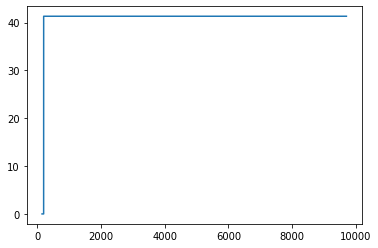

In [107]:
plot(drone_data["RTKdata:Lat_P"])
for i,t in enumerate(drone_data["RTKdata:Lat_P"]):
    print(i,t)

In [110]:
np.where(np.isnan(drone_data["RTKdata:Lat_P"])==False)


(array([ 154,  155,  156, ..., 9704, 9705, 9706]),)